<p style="font-family: Arial; font-size:2.75vw;color:purple; font-style:bold"><br>
Under 5 years mortality indicators in Argentina
</p><br>

##### This is a mid-course project presented for the Python for Data Science course in EDX.

In this project we use an open dataset from Kaggle: The World Development Indicators Dataset.
This is a slightly modified version of the original dataset from The World Bank
List of the available indicators and a list of the available countries.


In this project we are interested to discover which factors could influence in children  under 5 years mortality in Argentina. 
With this purpose in mind we will explore the World Development Indicators Dataset looking for this indicators. 
Later we will compare our results with this of neighboring countries in order to find out if this indicators are also
present in that countries.


### Research Question:
    
#### What are the key indicators that could influence in children under 5 years mortality in Argentina and its neighboring countries?


#### Data Analysis and exploration

In [1]:
# import appropriate libraries

import matplotlib.pyplot as plt
import numpy as np
import sqlite3
import pandas as pd 
%matplotlib inline

In [2]:
#world-development-indicators dataset
data = pd.read_csv('C:\\Users\\clara.o.villalba\\Documents\\Curso EDX\\Week5-Visualization\\Week5-Visualization\\world-development-indicators\\Indicators.csv')
data.shape
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [3]:
#How many UNIQUE country names are there ?
countries = data['CountryName'].unique()#.tolist()
#len(countries)
#print(countries)

In [4]:
# How many years of data do we have ?
years = data['Year'].unique().tolist()
len(years)

56

In [5]:
#How many indicators are related  with death?
all_indicators = data['IndicatorName'].unique().tolist()
#print(all_indicators)
deaths = [x for x in all_indicators if "death" in x.lower()]
print(deaths)

['Death rate, crude (per 1,000 people)', 'Number of infant deaths', 'Number of under-five deaths', 'Battle-related deaths (number of people)', 'Lifetime risk of maternal death (%)', 'Lifetime risk of maternal death (1 in: rate varies by country)', 'Number of maternal deaths', 'Completeness of death registration with cause-of-death information (%)', 'Number of neonatal deaths', 'Completeness of infant death reporting (% of reported infant deaths to estimated infant deaths)', 'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)', 'Cause of death, by injury (% of total)', 'Cause of death, by non-communicable diseases (% of total)', 'Completeness of total death reporting (% of reported total deaths to estimated total deaths)']


#### Finding Indicators

I’m looking at which factors could influence in children death under 5 years old in Argentina

In [6]:
#How many indicators are related  with child under 5 years?

all_indicators = data['IndicatorName'].unique().tolist()
deaths_under_5 = [x for x in all_indicators if "under 5" in x.lower()]
print(deaths_under_5)
len(deaths_under_5)

['Prevalence of stunting, height for age (% of children under 5)', 'Prevalence of underweight, weight for age (% of children under 5)', 'Prevalence of wasting, weight for height (% of children under 5)', 'Prevalence of overweight, weight for height (% of children under 5)', 'Prevalence of overweight, weight for height, female (% of children under 5)', 'Prevalence of overweight, weight for height, male (% of children under 5)', 'Prevalence of severe wasting, weight for height (% of children under 5)', 'Prevalence of severe wasting, weight for height, female (% of children under 5)', 'Prevalence of severe wasting, weight for height, male (% of children under 5)', 'Prevalence of stunting, height for age, female (% of children under 5)', 'Prevalence of stunting, height for age, male (% of children under 5)', 'Prevalence of underweight, weight for age, female (% of children under 5)', 'Prevalence of underweight, weight for age, male (% of children under 5)', 'Prevalence of wasting, weight f

19

There are 19 indicators related with childs under 5 years. I Choose 4 to evaluate in Argentina:
* 'SH.STA.OWGH.ZS': 'Prevalence of overweight, weight for height'
* 'SH.STA.STNT.ZS': 'Prevalence of stunting, height for age'
* 'SH.STA.MALN.ZS': 'Prevalence of underweight'
* 'SH.ANM.CHLD.ZS': 'Prevalence of anemia among children'

In [7]:
#codes to use:
child_overweight ='SH.STA.OWGH.ZS'
child_stuntin = 'SH.STA.STNT.ZS'  
child_underweight = 'SH.STA.MALN.ZS' 
child_anemia = 'SH.ANM.CHLD.ZS' 
#country:
argen = 'Argentina'
#masks to use:
mask_arg = data['CountryName'].str.contains(argen)
mask_child_overw = data['IndicatorCode'].str.contains(child_overweight)
mask_child_stun = data['IndicatorCode'].str.contains(child_stuntin)
mask_child_underw = data['IndicatorCode'].str.contains(child_underweight)
mask_child_anemia = data['IndicatorCode'].str.contains(child_anemia)
#apply the masks
child_overw_Arg =data[mask_arg & mask_child_overw] 
child_stun_Arg = data[mask_arg & mask_child_stun]  
child_underw_Arg = data[mask_arg & mask_child_underw]
child_anemia = data[mask_arg & mask_child_anemia]

Now I plot these indicators over the years

(0, 35)

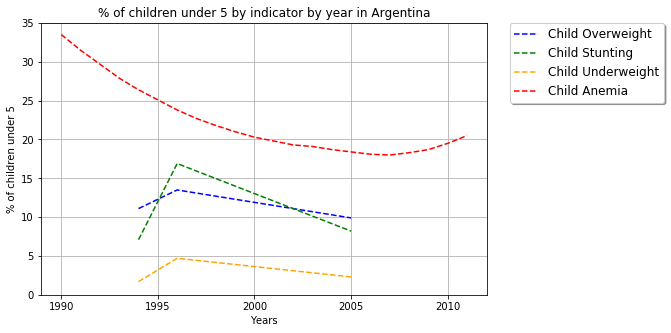

In [8]:
plt.subplots(figsize=(8, 5))
plt.plot(child_overw_Arg.Year,child_overw_Arg.Value,'r--',label='Child Overweight',color='blue')
plt.plot(child_stun_Arg.Year,child_stun_Arg.Value,'r--',label='Child Stunting',color='green')
plt.plot(child_underw_Arg.Year,child_underw_Arg.Value, 'r--',label='Child Underweight',color='orange')
plt.plot(child_anemia.Year,child_anemia.Value, 'r--',label='Child Anemia',color='red')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,shadow=True,
                    prop={'weight':'roman','size':'large'})
#
plt.grid(True)
plt.xlabel('Years')
plt.ylabel('% of children under 5')
plt.title('% of children under 5 by indicator by year in Argentina')
plt.ylim(0,35)

### The Key Indicator

We can see that almost all the indicators starts in year 1994 and end in year 2005, except by Child Anemia indicator. 
Now Iam going to see if this indicator in related with de number of child under-five death in this country sinde the year 1990 to 2011.
But first let filter this indicator.

In [9]:
#number of under-five childs death

num_under_five = 'Number of under-five'
mask_under_five = data['IndicatorName'].str.contains(num_under_five)
death_under5_Arg = data[mask_arg & mask_under_five]
len(death_under5_Arg)

47

[38.323, 38.657, 39.123, 39.648, 40.025, 40.143, 39.916, 39.363, 38.237, 36.573, 34.287, 31.651, 28.882, 26.149, 23.735, 21.912, 20.721, 20.197, 20.226, 20.466, 20.576, 20.41, 19.913, 19.214, 18.339, 17.555, 16.811, 16.117, 15.436, 14.874, 14.398, 14.023, 13.841, 13.758, 13.632, 13.367, 12.904, 12.389, 11.854, 11.422, 11.017, 10.681, 10.424, 10.224, 9.973, 9.77, 9.513]


(0, 45)

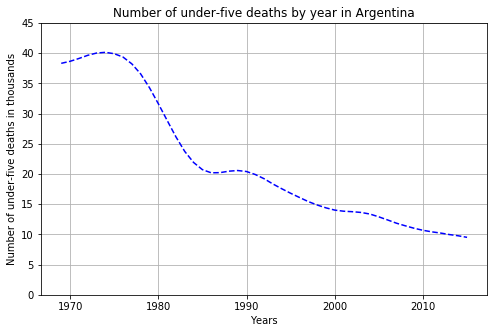

In [10]:
death_under5_Arg_values = [x/1000 for x in death_under5_Arg['Value']]

print(death_under5_Arg_values)
plt.subplots(figsize=(8, 5))
plt.plot(death_under5_Arg.Year,death_under5_Arg_values,'r--',color='blue')
plt.grid(True)
plt.xlabel('Years')
plt.ylabel('Number of under-five deaths in thousands')
plt.title('Number of under-five deaths by year in Argentina')
plt.ylim(0,45)


Now to find out if the number of under-five child deaths is related to the Child anemia indicator, I have to truncate both dataframes so that they have the same date range. But first I check the range of each one.

In [11]:
years = death_under5_Arg['Year'].unique().tolist()
print(min(years)," to ",max(years))

years2 = child_anemia['Year'].unique().tolist()
print(min(years2)," to ",max(years2))

1969  to  2015
1990  to  2011


We can see now that a range between 1990 and 2011 will be correct. Now I truncate each dataframe

In [12]:
death_under5_Arg_trunc = death_under5_Arg[death_under5_Arg['Year']>= 1990]
death_under5_Arg_trunc2 = death_under5_Arg_trunc[death_under5_Arg_trunc['Year']<=2011]

child_anemia_trunc =  child_anemia[child_anemia['Year']>= 1990]
child_anemia_trunc2 = child_anemia_trunc[child_anemia_trunc['Year']<= 2011]

print(len(death_under5_Arg_trunc2))
print(len(child_anemia_trunc2))

22
22


Now I will plot these using a scatter plot to see if there is a relation between then

(0, 40)

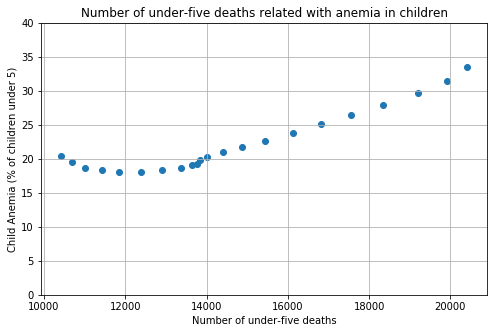

In [13]:
plt.subplots(figsize=(8, 5))
plt.scatter(death_under5_Arg_trunc2.Value,child_anemia_trunc2.Value)
plt.xlabel('Number of under-five deaths')
plt.ylabel('Child Anemia (% of children under 5)')
plt.grid(True)
plt.title('Number of under-five deaths related with anemia in children')
plt.ylim(0,40)



This look like a strong relationship. We can test this by looking at correlation.

In [14]:
np.corrcoef(death_under5_Arg_trunc2.Value,child_anemia_trunc2.Value)

array([[1.        , 0.93336502],
       [0.93336502, 1.        ]])

We can see that there is a strong relationship between them

### Indicators in neighboring countries 


Now that we have the data for Argentina, let's see the same indicators in it bordering countries:
* Uruguay
* Paraguay
* Brasil
* Chile
* Bolivia

### Uruguay

In [15]:
uru = 'Uruguay'
child_anemia = 'SH.ANM.CHLD.ZS' 
mask_uru = data['CountryName'].str.contains(uru)
mask_child_anemia = data['IndicatorCode'].str.contains(child_anemia)

death_under5_Uru = data[mask_uru & mask_under_five] #Number of under-five deaths in Uruguay
child_anemia_Uru = data[mask_uru & mask_child_anemia] 


In [16]:
years = death_under5_Uru['Year'].unique().tolist()
print(min(years)," to ",max(years))

years2 = child_anemia_Uru['Year'].unique().tolist()
print(min(years2)," to ",max(years2))


1960  to  2015
1990  to  2011


In [17]:
death_under5_Uru_trunc =  death_under5_Uru[death_under5_Uru['Year']>= 1990]
death_under5_Uru_trunc2 = death_under5_Uru_trunc[death_under5_Uru_trunc['Year']<= 2011]
print(len(death_under5_Uru_trunc2))
print(len(child_anemia_Uru))

22
22


(0, 40)

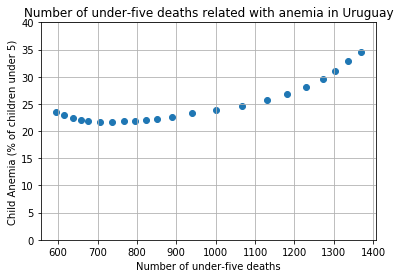

In [18]:
plt.scatter(death_under5_Uru_trunc2.Value,child_anemia_Uru.Value)
plt.xlabel('Number of under-five deaths')
plt.ylabel('Child Anemia (% of children under 5)')
plt.grid(True)
plt.title('Number of under-five deaths related with anemia in Uruguay')
plt.ylim(0,40)
#np.corrcoef(child_anemia_Uru_trunc2.Value,child_anemia_trunc2.Value)

In [19]:
np.corrcoef(death_under5_Uru_trunc2.Value,child_anemia_Uru.Value)

array([[1.        , 0.89008625],
       [0.89008625, 1.        ]])

We can see that there is a strong relationship between them

### Paraguay

In [20]:
par = 'Paraguay'
child_anemia = 'SH.ANM.CHLD.ZS' 
mask_par = data['CountryName'].str.contains(par)
mask_child_anemia = data['IndicatorCode'].str.contains(child_anemia)

death_under5_Par = data[mask_par & mask_under_five] #Number of under-five deaths in Paraguay
child_anemia_Par = data[mask_par & mask_child_anemia] 

In [21]:
years = death_under5_Par['Year'].unique().tolist()
print(min(years)," to ",max(years))

years2 = child_anemia_Par['Year'].unique().tolist()
print(min(years2)," to ",max(years2))

1960  to  2015
1990  to  2011


In [22]:
death_under5_Par_trunc =  death_under5_Par[death_under5_Par['Year']>= 1990]
death_under5_Par_trunc2 = death_under5_Par_trunc[death_under5_Par_trunc['Year']<= 2011]
print(len(death_under5_Par_trunc2))
print(len(child_anemia_Par))

22
22


(0, 50)

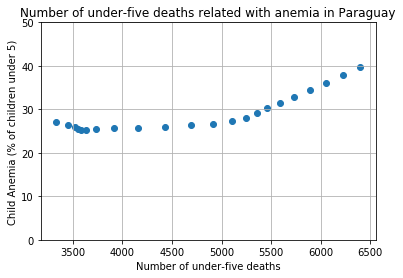

In [23]:
plt.scatter(death_under5_Par_trunc2.Value,child_anemia_Par.Value)
plt.xlabel('Number of under-five deaths')
plt.ylabel('Child Anemia (% of children under 5)')
plt.grid(True)
plt.title('Number of under-five deaths related with anemia in Paraguay')
plt.ylim(0,50)

In [24]:
np.corrcoef(death_under5_Par_trunc2.Value,child_anemia_Par.Value)

array([[1.        , 0.86814251],
       [0.86814251, 1.        ]])

### Brasil

In [25]:
bra = 'Brazil'
child_anemia = 'SH.ANM.CHLD.ZS' 
mask_bra = data['CountryName'].str.contains(bra)
mask_child_anemia = data['IndicatorCode'].str.contains(child_anemia)

death_under5_Bra = data[mask_bra & mask_under_five] #Number of under-five deaths in Brasil
child_anemia_Bra = data[mask_bra & mask_child_anemia] 

In [26]:
years = death_under5_Bra['Year'].unique().tolist()
print(min(years)," to ",max(years))

years2 = child_anemia_Bra['Year'].unique().tolist()
print(min(years2)," to ",max(years2))

1960  to  2015
1990  to  2011


In [27]:
death_under5_Bra_trunc =  death_under5_Bra[death_under5_Bra['Year']>= 1990]
death_under5_Bra_trunc2 = death_under5_Bra_trunc[death_under5_Bra_trunc['Year']<= 2011]
print(len(death_under5_Bra_trunc2))
print(len(child_anemia_Bra))

22
22


(0, 40)

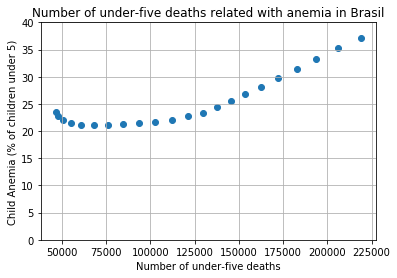

In [28]:
plt.scatter(death_under5_Bra_trunc2.Value,child_anemia_Bra.Value)
plt.xlabel('Number of under-five deaths')
plt.ylabel('Child Anemia (% of children under 5)')
plt.grid(True)
plt.title('Number of under-five deaths related with anemia in Brasil')
plt.ylim(0,40)

In [29]:
np.corrcoef(death_under5_Bra_trunc2.Value,child_anemia_Bra.Value)

array([[1.        , 0.89301909],
       [0.89301909, 1.        ]])

### Chile

In [30]:
chile = 'Chile'
child_anemia = 'SH.ANM.CHLD.ZS' 
mask_chile = data['CountryName'].str.contains(chile)
mask_child_anemia = data['IndicatorCode'].str.contains(child_anemia)

death_under5_Chile = data[mask_chile & mask_under_five] #Number of under-five deaths in Brasil
child_anemia_Chile = data[mask_chile & mask_child_anemia] 

In [31]:
years = death_under5_Chile['Year'].unique().tolist()
print(min(years)," to ",max(years))

years2 = child_anemia_Chile['Year'].unique().tolist()
print(min(years2)," to ",max(years2))

1960  to  2015
1990  to  2011


In [32]:
death_under5_Chile_trunc =  death_under5_Chile[death_under5_Chile['Year']>= 1990]
death_under5_Chile_trunc2 = death_under5_Chile_trunc[death_under5_Chile_trunc['Year']<= 2011]
print(len(death_under5_Chile_trunc2))
print(len(child_anemia_Chile))

22
22


(0, 40)

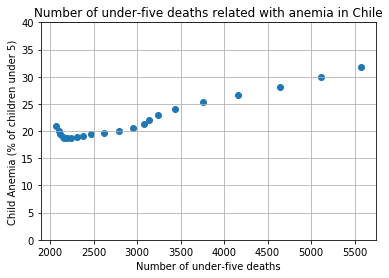

In [33]:
plt.scatter(death_under5_Chile_trunc2.Value,child_anemia_Chile.Value)
plt.xlabel('Number of under-five deaths')
plt.ylabel('Child Anemia (% of children under 5)')
plt.grid(True)
plt.title('Number of under-five deaths related with anemia in Chile')
plt.ylim(0,40)

In [34]:
np.corrcoef(death_under5_Chile_trunc2.Value,child_anemia_Chile.Value)

array([[1.        , 0.97622008],
       [0.97622008, 1.        ]])

### Bolivia

In [35]:
boliv = 'Bolivia'
child_anemia = 'SH.ANM.CHLD.ZS' 
mask_boliv = data['CountryName'].str.contains(boliv)
mask_child_anemia = data['IndicatorCode'].str.contains(child_anemia)

death_under5_Boliv = data[mask_boliv & mask_under_five] #Number of under-five deaths in Brasil
child_anemia_Boliv = data[mask_boliv & mask_child_anemia] 

In [36]:
years = death_under5_Boliv['Year'].unique().tolist()
print(min(years)," to ",max(years))

years2 = child_anemia_Boliv['Year'].unique().tolist()
print(min(years2)," to ",max(years2))

1960  to  2015
1990  to  2011


In [37]:
death_under5_Boliv_trunc =  death_under5_Boliv[death_under5_Boliv['Year']>= 1990]
death_under5_Boliv_trunc2 = death_under5_Boliv_trunc[death_under5_Boliv_trunc['Year']<= 2011]
print(len(death_under5_Boliv_trunc2))
print(len(child_anemia_Boliv))

22
22


Text(0.5, 1.0, 'Number of under-five deaths related with anemia in Bolivia')

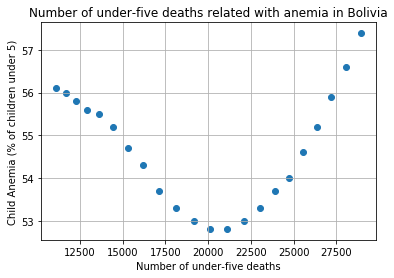

In [38]:
plt.scatter(death_under5_Boliv_trunc2.Value,child_anemia_Boliv.Value)
plt.xlabel('Number of under-five deaths')
plt.ylabel('Child Anemia (% of children under 5)')
plt.grid(True)
plt.title('Number of under-five deaths related with anemia in Bolivia')
#plt.ylim(0,60)

In [39]:
np.corrcoef(death_under5_Boliv_trunc2.Value,child_anemia_Boliv.Value)

array([[ 1.        , -0.02814757],
       [-0.02814757,  1.        ]])

We can see that the Correlation Coefficient is negative, this means that the two variables move in opposite directions. 
A negative correlation coefficient is also referred to as an inverse correlation

### Comparison of countries

Text(0.5, 1.0, 'Child Anemia (% of children under 5)')

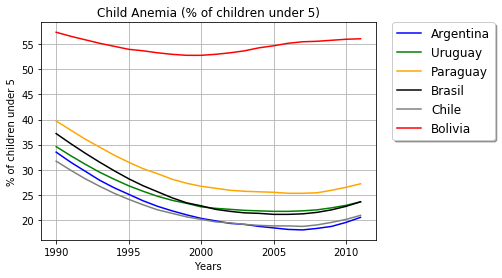

In [40]:
plt.plot(child_anemia_trunc2.Year,child_anemia_trunc2.Value,label='Argentina',color='blue')
plt.plot(child_anemia_Uru.Year,child_anemia_Uru.Value,label='Uruguay',color='green')
plt.plot(child_anemia_Par.Year,child_anemia_Par.Value,label='Paraguay',color='orange')
plt.plot(child_anemia_Bra.Year,child_anemia_Bra.Value,label='Brasil',color='black')
plt.plot(child_anemia_Chile.Year,child_anemia_Chile.Value,label='Chile',color='grey')
plt.plot(child_anemia_Boliv.Year,child_anemia_Boliv.Value,label='Bolivia',color='red')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,shadow=True,
                    prop={'weight':'roman','size':'large'})
#
plt.grid(True)
plt.xlabel('Years')
plt.ylabel('% of children under 5')
plt.title('Child Anemia (% of children under 5)')
#plt.ylim(0,60)

Comparing the results in the plot above, we can see that Bolivia has the highest % of mortality of children under 5 by anemia

#### Now we are going to show this results in a Map using folium library

In [41]:
import folium
country_geo ='geo/world-countries.json'

In [42]:
hist_year = 2011
child_anemia = 'SH.ANM.CHLD.ZS' 
countries = ['Argentina','Uruguay','Paraguay','Brazil','Chile','Bolivia']
mask_countries = data['CountryName'].isin(countries)
mask_child_anemia = data['IndicatorCode'].str.contains(child_anemia)
mask_year = data['Year']= hist_year

# apply our mask
stage = data[mask_child_anemia & mask_year & mask_countries]
print(stage)
#stage.head()

        CountryName CountryCode  \
1898965   Argentina         ARG   
1906160     Bolivia         BOL   
1907834      Brazil         BRA   
1914524       Chile         CHL   
1968077    Paraguay         PRY   
...             ...         ...   
5064546     Bolivia         BOL   
5067343      Brazil         BRA   
5076690       Chile         CHL   
5157295    Paraguay         PRY   
5195933     Uruguay         URY   

                                             IndicatorName   IndicatorCode  \
1898965  Prevalence of anemia among children (% of chil...  SH.ANM.CHLD.ZS   
1906160  Prevalence of anemia among children (% of chil...  SH.ANM.CHLD.ZS   
1907834  Prevalence of anemia among children (% of chil...  SH.ANM.CHLD.ZS   
1914524  Prevalence of anemia among children (% of chil...  SH.ANM.CHLD.ZS   
1968077  Prevalence of anemia among children (% of chil...  SH.ANM.CHLD.ZS   
...                                                    ...             ...   
5064546  Prevalence of anemia amo

In [43]:
plot_data = stage[['CountryCode','Value']]
plot_data.head()

,CountryCode,Value
1898965,ARG,33.5
1906160,BOL,57.4
1907834,BRA,37.2
1914524,CHL,31.7
1968077,PRY,39.7


In [44]:
# label for the legend
hist_indicator = stage.iloc[0]['IndicatorName']

In [45]:
# Setup a folium map at a high-level zoom @Alok - what is the 100,0, doesn't seem like lat long
map = folium.Map(location=[100, 0], zoom_start=1.5)

In [46]:
# choropleth maps bind Pandas Data Frames and json geometries.  This allows us to quickly visualize data combinations
map.choropleth(geo_data=country_geo, data=plot_data,
             columns=['CountryCode', 'Value'],
             key_on='feature.id',
             fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.2,
             legend_name=hist_indicator)

C:\Users\clara.o.villalba\AppData\Local\Continuum\anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [47]:
# Create Folium plot
map.save('plot_data.html')

In [48]:
# Import the Folium interactive html file
from IPython.display import HTML
HTML('<iframe src=plot_data.html width=700 height=450></iframe>')

C:\Users\clara.o.villalba\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


### Conclusions

* After this research we can conclude that Child Anemia is one of the key indicator related with the mortality of children under five in Argentina.

* We also see that this indicator might  influence in their neighbours countries.
 
* It remains for future research to verify if this indicator has such a close relationship with infant mortality in each country.
